# 이상치 처리하기

### 사용할 데이터 불러오기

In [4]:
# bicycle_out.csv

import pandas as pd

# seaborn과 연동되어 있는 모듈들
#그림 그리는 라이브러리
import matplotlib as mpl
import matplotlib.pylab as plt
# 내장 데이터 있음
import seaborn as sns

#행의 위치 찾을 때 사용
import numpy as np

In [5]:
# bicycle_out.csv 파일 읽어 들이기
# 데이터프레임 변수 = df
# 파일 경로 지정
file_path = './data/bicycle_out.csv'

# 파일을 encoding='euc-kr'로 읽어 들여서 DataFrame 형태로 읽어들이기
df = pd.read_csv(file_path, encoding='euc-kr')
df

,자전거번호,대여일시,대여소번호,대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리,나이
0,SPB-23220,2019-11-01 8:48,646,장한평역 1번출구 (국민은행앞),3.0,2019-11-01 9:01,3,중랑센터,7.0,12.0,1100.0,50
1,SPB-16216,2019-11-04 8:38,646,장한평역 1번출구 (국민은행앞),2.0,2019-11-04 8:56,3,중랑센터,2.0,7.0,1420.0,31
2,SPB-21097,2019-11-04 8:46,646,장한평역 1번출구 (국민은행앞),1.0,2019-11-04 8:57,3,중랑센터,7.0,10.0,NaN,32
3,SPB-22292,2019-11-05 8:34,646,장한평역 1번출구 (국민은행앞),1.0,2019-11-05 8:45,3,중랑센터,NaN,10.0,1380.0,21
4,SPB-07935,2019-11-05 12:29,512,뚝섬역 1번 출구 옆,11.0,2019-11-05 12:39,3,중랑센터,7.0,10.0,1650.0,120
...,...,...,...,...,...,...,...,...,...,...,...,...
415,SPB-12116,2019-11-15 4:22,112,극동방송국 앞,5.0,2019-11-15 4:33,101,(구)합정동 주민센터,1.0,11.0,2200.0,22
416,SPB-17768,2019-11-15 9:31,103,망원역 2번출구 앞,14.0,2019-11-15 9:37,101,(구)합정동 주민센터,NaN,5.0,NaN,22
417,SPB-18841,2019-11-15 20:40,113,홍대입구역 2번출구 앞,24.0,2019-11-15 20:53,101,(구)합정동 주민센터,1.0,12.0,2280.0,37
418,SPB-24467,2019-11-15 21:55,152,마포구민체육센터 앞,18.0,2019-11-15 22:05,101,(구)합정동 주민센터,1.0,10.0,1180.0,27


In [6]:
df.isna().sum()

자전거번호       0
대여일시        0
대여소번호       0
대여소명        0
대여거치대      24
반납일시        0
반납대여소번호     0
반납대여소명      0
반납거치대      11
이용시간       15
이용거리       16
나이          0
dtype: int64

In [7]:
# 결측치 행 삭제
df.dropna(axis = 0)
df_drop_narow = df.dropna(axis = 0)
df_drop_narow
# df_drop_narow.isna().sum() # 확인용

,자전거번호,대여일시,대여소번호,대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리,나이
0,SPB-23220,2019-11-01 8:48,646,장한평역 1번출구 (국민은행앞),3.0,2019-11-01 9:01,3,중랑센터,7.0,12.0,1100.0,50
1,SPB-16216,2019-11-04 8:38,646,장한평역 1번출구 (국민은행앞),2.0,2019-11-04 8:56,3,중랑센터,2.0,7.0,1420.0,31
4,SPB-07935,2019-11-05 12:29,512,뚝섬역 1번 출구 옆,11.0,2019-11-05 12:39,3,중랑센터,7.0,10.0,1650.0,120
5,SPB-18401,2019-11-06 8:52,646,장한평역 1번출구 (국민은행앞),1.0,2019-11-06 9:09,3,중랑센터,7.0,11.0,1350.0,30
6,SPB-18350,2019-11-06 8:35,646,장한평역 1번출구 (국민은행앞),1.0,2019-11-06 9:10,3,중랑센터,2.0,9.0,1390.0,26
...,...,...,...,...,...,...,...,...,...,...,...,...
414,SPB-24515,2019-11-15 3:58,112,극동방송국 앞,1.0,2019-11-15 4:08,101,(구)합정동 주민센터,1.0,9.0,1620.0,21
415,SPB-12116,2019-11-15 4:22,112,극동방송국 앞,5.0,2019-11-15 4:33,101,(구)합정동 주민센터,1.0,11.0,2200.0,22
417,SPB-18841,2019-11-15 20:40,113,홍대입구역 2번출구 앞,24.0,2019-11-15 20:53,101,(구)합정동 주민센터,1.0,12.0,2280.0,37
418,SPB-24467,2019-11-15 21:55,152,마포구민체육센터 앞,18.0,2019-11-15 22:05,101,(구)합정동 주민센터,1.0,10.0,1180.0,27


In [8]:
# 인덱스 번호 재배열하기
# 데이터(행 기준)이 삭제 되었을때 

df_drop_narow.reset_index()
# index라는 컬럼이 새로 생기는데 기존에 있던 원본 인덱스이다.

df_drop_narow = df_drop_narow.reset_index(drop = True)

df_drop_narow.reset_index(drop = True)
# 이렇게 해야 기존 데이터의 형태를 유지함 ※ 디폴트는 False


,자전거번호,대여일시,대여소번호,대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리,나이
0,SPB-23220,2019-11-01 8:48,646,장한평역 1번출구 (국민은행앞),3.0,2019-11-01 9:01,3,중랑센터,7.0,12.0,1100.0,50
1,SPB-16216,2019-11-04 8:38,646,장한평역 1번출구 (국민은행앞),2.0,2019-11-04 8:56,3,중랑센터,2.0,7.0,1420.0,31
2,SPB-07935,2019-11-05 12:29,512,뚝섬역 1번 출구 옆,11.0,2019-11-05 12:39,3,중랑센터,7.0,10.0,1650.0,120
3,SPB-18401,2019-11-06 8:52,646,장한평역 1번출구 (국민은행앞),1.0,2019-11-06 9:09,3,중랑센터,7.0,11.0,1350.0,30
4,SPB-18350,2019-11-06 8:35,646,장한평역 1번출구 (국민은행앞),1.0,2019-11-06 9:10,3,중랑센터,2.0,9.0,1390.0,26
...,...,...,...,...,...,...,...,...,...,...,...,...
353,SPB-24515,2019-11-15 3:58,112,극동방송국 앞,1.0,2019-11-15 4:08,101,(구)합정동 주민센터,1.0,9.0,1620.0,21
354,SPB-12116,2019-11-15 4:22,112,극동방송국 앞,5.0,2019-11-15 4:33,101,(구)합정동 주민센터,1.0,11.0,2200.0,22
355,SPB-18841,2019-11-15 20:40,113,홍대입구역 2번출구 앞,24.0,2019-11-15 20:53,101,(구)합정동 주민센터,1.0,12.0,2280.0,37
356,SPB-24467,2019-11-15 21:55,152,마포구민체육센터 앞,18.0,2019-11-15 22:05,101,(구)합정동 주민센터,1.0,10.0,1180.0,27


In [9]:
# 이상치 확인
# 그림으로 확인
# 이상값 계산
# 계산해서 인덱스값 추출
# 추출한 인덱스 값으로 데이터 조절

#그림 그리는 라이브러리 불러들이기 (맨 위에도 있음)
import matplotlib as mpl
import matplotlib.pylab as plt


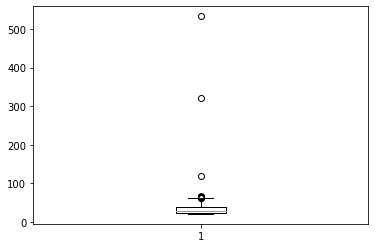

count    358.000000
mean      35.159218
std       32.747653
min       21.000000
25%       24.000000
50%       29.000000
75%       39.000000
max      533.000000
Name: 나이, dtype: float64

In [10]:
# 박스 플롯 그리기
plt.boxplot(df_drop_narow[['나이']])
plt.show()

# '나이'데이터의 기초통계 조회 Summary
df_drop_narow['나이'].describe()

In [11]:
# 전체 데이터 프레임에서 '나이'가 100살보다 많은 데이터 조회
# 조건문 2개부터는 소괄호로 묶어야함
df_drop_narow[df_drop_narow['나이'] > 100]

,자전거번호,대여일시,대여소번호,대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리,나이
2,SPB-07935,2019-11-05 12:29,512,뚝섬역 1번 출구 옆,11.0,2019-11-05 12:39,3,중랑센터,7.0,10.0,1650.0,120
19,SPB-20840,2019-11-28 8:32,419,홈플러스 앞,1.0,2019-11-28 8:35,5,상암센터 정비실,5.0,3.0,280.0,533
33,SPB-11637,2019-11-01 15:35,103,망원역 2번출구 앞,4.0,2019-11-01 15:41,101,(구)합정동 주민센터,2.0,5.0,1110.0,320


In [12]:
# 전체 데이터 프레임 내에서 나이가 10살 이하인 데이터조회
df_drop_narow[df_drop_narow['나이'] < 11]


,자전거번호,대여일시,대여소번호,대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리,나이


In [26]:
# 전체 데이터 프레임에서 '나이'가 100살보다 많거나 나이가 10살 이하인 데이터 조회
df_drop_narow[(df_drop_narow['나이'] < 11) | (df_drop_narow['나이'] > 100)]

,자전거번호,대여일시,대여소번호,대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리,나이
2,SPB-07935,2019-11-05 12:29,512,뚝섬역 1번 출구 옆,11.0,2019-11-05 12:39,3,중랑센터,7.0,10.0,1650.0,120
19,SPB-20840,2019-11-28 8:32,419,홈플러스 앞,1.0,2019-11-28 8:35,5,상암센터 정비실,5.0,3.0,280.0,533
33,SPB-11637,2019-11-01 15:35,103,망원역 2번출구 앞,4.0,2019-11-01 15:41,101,(구)합정동 주민센터,2.0,5.0,1110.0,320


### 최대/최소값 계산하여 제거하기

In [14]:
# 넘파이 라이브러리 사용
import numpy as np
# 이상치가 아닌 최대값 최소값 알아내기

In [15]:
# 박스 플롯에서 유효데이터 q1(25%)과 q3(75%)값

q1,q2,q3 = np.percentile(df_drop_narow['나이'],[25,50,75])
np.percentile(df_drop_narow['나이'],[25,50,75])
print(q1)
print(q2)
print(q3)


24.0
29.0
39.0


In [16]:
# iqr값 확인
iqr = q3 - q1
iqr

15.0

In [17]:
# 최소값 min = q1 - (1.5*IQR)
# 최대값 max = q3 + (1.5*IQR) 알아내기

In [18]:
# 최대값 계산하기
upper_bound = q3 + (1.5*iqr)

upper_bound


61.5

In [19]:
# 최소값 계산하기
lower_bound = q1 - (1.5*iqr)

lower_bound


1.5

In [20]:
# 이상치 데이터 조회하기
df_drop_narow[(df_drop_narow['나이'] < lower_bound) | (df_drop_narow['나이'] > upper_bound)]


,자전거번호,대여일시,대여소번호,대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리,나이
2,SPB-07935,2019-11-05 12:29,512,뚝섬역 1번 출구 옆,11.0,2019-11-05 12:39,3,중랑센터,7.0,10.0,1650.0,120
19,SPB-20840,2019-11-28 8:32,419,홈플러스 앞,1.0,2019-11-28 8:35,5,상암센터 정비실,5.0,3.0,280.0,533
33,SPB-11637,2019-11-01 15:35,103,망원역 2번출구 앞,4.0,2019-11-01 15:41,101,(구)합정동 주민센터,2.0,5.0,1110.0,320
117,SPB-24758,2019-11-04 17:59,106,합정역 7번출구 앞,7.0,2019-11-04 18:20,101,(구)합정동 주민센터,5.0,20.0,1130.0,65
180,SPB-06127,2019-11-06 16:06,1925,동양미래대학교 정문 옆,6.0,2019-11-06 17:09,101,(구)합정동 주민센터,4.0,62.0,12610.0,66
218,SPB-15960,2019-11-08 9:10,103,망원역 2번출구 앞,1.0,2019-11-08 9:18,101,(구)합정동 주민센터,4.0,8.0,1060.0,63
246,SPB-08818,2019-11-08 23:13,108,서교동 사거리,2.0,2019-11-08 23:24,101,(구)합정동 주민센터,2.0,10.0,1360.0,65
304,SPB-24781,2019-11-12 9:47,104,합정역 1번출구 앞,10.0,2019-11-12 9:53,101,(구)합정동 주민센터,3.0,6.0,1070.0,63
305,SPB-24781,2019-11-12 10:45,101,(구)합정동 주민센터,3.0,2019-11-12 11:50,101,(구)합정동 주민센터,4.0,64.0,5600.0,65
306,SPB-24858,2019-11-12 11:41,113,홍대입구역 2번출구 앞,21.0,2019-11-12 11:54,101,(구)합정동 주민센터,1.0,11.0,2060.0,67


In [23]:
# 값 넣고 최대최소값 구하고 데이터 추출하는 함수 만들기

def upDown(q1,q3):
    iqr = q3 - q1
    lower_bound = q1 - (1.5*iqr)
    lower_bound
    
    upper_bound = q3 + (1.5*iqr)
    upper_bound
    
    print('최대',upper_bound, '최소', lower_bound)
    return df_drop_narow[(df_drop_narow['나이'] < lower_bound) | (df_drop_narow['나이'] > upper_bound)]

def upDown2(data):
    q1,q3 = np.percentile(data,[25,75])
    iqr = q3 - q1
    lower_bound = q1 - (1.5*iqr)
    lower_bound
    
    upper_bound = q3 + (1.5*iqr)
    upper_bound
    
    print('최대',upper_bound, '최소', lower_bound)
    return df_drop_narow[(data < lower_bound) | (data > upper_bound)]

def outerLIne_iqr(df_data, data):
    q1,q3 = np.percentile(df_data[data],[25,75])
    iqr = q3 - q1
    lower_bound = q1 - (1.5*iqr)
    lower_bound
    
    upper_bound = q3 + (1.5*iqr)
    upper_bound
    
    print('최대',upper_bound, '최소', lower_bound)
    return df_data[(df_data[data] < lower_bound) | (df_data[data] > upper_bound)]

In [24]:
# upDown(24,39)
outerLIne_iqr(df_drop_narow,'나이')

최대 61.5 최소 1.5


,자전거번호,대여일시,대여소번호,대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리,나이
2,SPB-07935,2019-11-05 12:29,512,뚝섬역 1번 출구 옆,11.0,2019-11-05 12:39,3,중랑센터,7.0,10.0,1650.0,120
19,SPB-20840,2019-11-28 8:32,419,홈플러스 앞,1.0,2019-11-28 8:35,5,상암센터 정비실,5.0,3.0,280.0,533
33,SPB-11637,2019-11-01 15:35,103,망원역 2번출구 앞,4.0,2019-11-01 15:41,101,(구)합정동 주민센터,2.0,5.0,1110.0,320
117,SPB-24758,2019-11-04 17:59,106,합정역 7번출구 앞,7.0,2019-11-04 18:20,101,(구)합정동 주민센터,5.0,20.0,1130.0,65
180,SPB-06127,2019-11-06 16:06,1925,동양미래대학교 정문 옆,6.0,2019-11-06 17:09,101,(구)합정동 주민센터,4.0,62.0,12610.0,66
218,SPB-15960,2019-11-08 9:10,103,망원역 2번출구 앞,1.0,2019-11-08 9:18,101,(구)합정동 주민센터,4.0,8.0,1060.0,63
246,SPB-08818,2019-11-08 23:13,108,서교동 사거리,2.0,2019-11-08 23:24,101,(구)합정동 주민센터,2.0,10.0,1360.0,65
304,SPB-24781,2019-11-12 9:47,104,합정역 1번출구 앞,10.0,2019-11-12 9:53,101,(구)합정동 주민센터,3.0,6.0,1070.0,63
305,SPB-24781,2019-11-12 10:45,101,(구)합정동 주민센터,3.0,2019-11-12 11:50,101,(구)합정동 주민센터,4.0,64.0,5600.0,65
306,SPB-24858,2019-11-12 11:41,113,홍대입구역 2번출구 앞,21.0,2019-11-12 11:54,101,(구)합정동 주민센터,1.0,11.0,2060.0,67


### 모듈이란 함수들의 집합같은것 (실행 안됨)

In [175]:
# outliers 모듈(만든거) 호출하기
import outliers as ot

In [181]:
ot.outerLIne_iqr(df_drop_narow,'나이')
# 이렇게 하면 되긴하는데 .py파일을 다루는 프로그램이 가상환경을 벗어나 있어서 제대로 앙댐

NameError: name 'np' is not defined

In [189]:
df_drop_narow[(df_drop_narow['나이'] > 61.5) | (df_drop_narow['나이'] < 1.5)]

,자전거번호,대여일시,대여소번호,대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리,나이
4,SPB-07935,2019-11-05 12:29,512,뚝섬역 1번 출구 옆,11.0,2019-11-05 12:39,3,중랑센터,7.0,10.0,1650.0,120
30,SPB-20840,2019-11-28 8:32,419,홈플러스 앞,1.0,2019-11-28 8:35,5,상암센터 정비실,5.0,3.0,280.0,533
47,SPB-11637,2019-11-01 15:35,103,망원역 2번출구 앞,4.0,2019-11-01 15:41,101,(구)합정동 주민센터,2.0,5.0,1110.0,320
148,SPB-24758,2019-11-04 17:59,106,합정역 7번출구 앞,7.0,2019-11-04 18:20,101,(구)합정동 주민센터,5.0,20.0,1130.0,65
221,SPB-06127,2019-11-06 16:06,1925,동양미래대학교 정문 옆,6.0,2019-11-06 17:09,101,(구)합정동 주민센터,4.0,62.0,12610.0,66
263,SPB-15960,2019-11-08 9:10,103,망원역 2번출구 앞,1.0,2019-11-08 9:18,101,(구)합정동 주민센터,4.0,8.0,1060.0,63
294,SPB-08818,2019-11-08 23:13,108,서교동 사거리,2.0,2019-11-08 23:24,101,(구)합정동 주민센터,2.0,10.0,1360.0,65
361,SPB-24781,2019-11-12 9:47,104,합정역 1번출구 앞,10.0,2019-11-12 9:53,101,(구)합정동 주민센터,3.0,6.0,1070.0,63
362,SPB-24781,2019-11-12 10:45,101,(구)합정동 주민센터,3.0,2019-11-12 11:50,101,(구)합정동 주민센터,4.0,64.0,5600.0,65
363,SPB-24858,2019-11-12 11:41,113,홍대입구역 2번출구 앞,21.0,2019-11-12 11:54,101,(구)합정동 주민센터,1.0,11.0,2060.0,67


In [194]:
((df_drop_narow['나이'] > 61.5) | (df_drop_narow['나이'] < 1.5))

0      False
1      False
2       True
3      False
4      False
       ...  
353    False
354    False
355    False
356    False
357    False
Name: 나이, Length: 358, dtype: bool

In [195]:
# 행 번호만 조회하기
np.where((df_drop_narow['나이'] > 61.5) | (df_drop_narow['나이'] < 1.5))


(array([  2,  19,  33, 117, 180, 218, 246, 304, 305, 306], dtype=int64),)

In [196]:
# 이상치가 있는 인덱스 번호만 조회하기
def get_outerliers_data(data):
    q1,q3 = np.percentile(data,[25,75])
    iqr = q3 - q1
    lower_bound = q1 - (1.5*iqr)
    lower_bound
    
    upper_bound = q3 + (1.5*iqr)
    upper_bound
    
    return np.where((data > 61.5) | (data < 1.5))

In [197]:
get_outerliers_data(df_drop_narow['나이'])

최대 61.5 최소 1.5


(array([  2,  19,  33, 117, 180, 218, 246, 304, 305, 306], dtype=int64),)

In [208]:
# 던체 데이터프레임에서 행 번호로 조회하기
# df_drop_narow.iloc[get_outerliers_data(df_drop_narow['나이'])]

# 너무 길어서 함수값(인덱스 값) 변수로 받아오기
outerliers_ind = get_outerliers_data(df_drop_narow['나이'])
df_drop_narow.iloc[outerliers_ind]

최대 61.5 최소 1.5


,자전거번호,대여일시,대여소번호,대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리,나이
2,SPB-07935,2019-11-05 12:29,512,뚝섬역 1번 출구 옆,11.0,2019-11-05 12:39,3,중랑센터,7.0,10.0,1650.0,120
19,SPB-20840,2019-11-28 8:32,419,홈플러스 앞,1.0,2019-11-28 8:35,5,상암센터 정비실,5.0,3.0,280.0,533
33,SPB-11637,2019-11-01 15:35,103,망원역 2번출구 앞,4.0,2019-11-01 15:41,101,(구)합정동 주민센터,2.0,5.0,1110.0,320
117,SPB-24758,2019-11-04 17:59,106,합정역 7번출구 앞,7.0,2019-11-04 18:20,101,(구)합정동 주민센터,5.0,20.0,1130.0,65
180,SPB-06127,2019-11-06 16:06,1925,동양미래대학교 정문 옆,6.0,2019-11-06 17:09,101,(구)합정동 주민센터,4.0,62.0,12610.0,66
218,SPB-15960,2019-11-08 9:10,103,망원역 2번출구 앞,1.0,2019-11-08 9:18,101,(구)합정동 주민센터,4.0,8.0,1060.0,63
246,SPB-08818,2019-11-08 23:13,108,서교동 사거리,2.0,2019-11-08 23:24,101,(구)합정동 주민센터,2.0,10.0,1360.0,65
304,SPB-24781,2019-11-12 9:47,104,합정역 1번출구 앞,10.0,2019-11-12 9:53,101,(구)합정동 주민센터,3.0,6.0,1070.0,63
305,SPB-24781,2019-11-12 10:45,101,(구)합정동 주민센터,3.0,2019-11-12 11:50,101,(구)합정동 주민센터,4.0,64.0,5600.0,65
306,SPB-24858,2019-11-12 11:41,113,홍대입구역 2번출구 앞,21.0,2019-11-12 11:54,101,(구)합정동 주민센터,1.0,11.0,2060.0,67


In [212]:
outerliers_ind.index
# 튜플형태

<function tuple.index(value, start=0, stop=9223372036854775807, /)>

In [213]:
df_drop_narow.index

RangeIndex(start=0, stop=358, step=1)

### 이상치 제거하기

In [219]:
# 이상치가 아닌 값만 따로 저장하기

age_non_outlier_index = []

# RangeIndex(start=0, stop=358, step=1)
for idx in df_drop_narow.index:
    # outerliers_ind[0] 2차원으로 있는듯
    if idx not in outerliers_ind[0]:
        age_non_outlier_index.append(idx)

        
len(age_non_outlier_index)

348

In [222]:
# 전체 프레임 데이터에서 정상 데이터만 조회하시오
df_drop_narow.iloc[age_non_outlier_index]

,자전거번호,대여일시,대여소번호,대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리,나이
0,SPB-23220,2019-11-01 8:48,646,장한평역 1번출구 (국민은행앞),3.0,2019-11-01 9:01,3,중랑센터,7.0,12.0,1100.0,50
1,SPB-16216,2019-11-04 8:38,646,장한평역 1번출구 (국민은행앞),2.0,2019-11-04 8:56,3,중랑센터,2.0,7.0,1420.0,31
3,SPB-18401,2019-11-06 8:52,646,장한평역 1번출구 (국민은행앞),1.0,2019-11-06 9:09,3,중랑센터,7.0,11.0,1350.0,30
4,SPB-18350,2019-11-06 8:35,646,장한평역 1번출구 (국민은행앞),1.0,2019-11-06 9:10,3,중랑센터,2.0,9.0,1390.0,26
5,SPB-11557,2019-11-08 14:52,3,중랑센터,7.0,2019-11-08 15:40,3,중랑센터,7.0,47.0,0.0,29
...,...,...,...,...,...,...,...,...,...,...,...,...
353,SPB-24515,2019-11-15 3:58,112,극동방송국 앞,1.0,2019-11-15 4:08,101,(구)합정동 주민센터,1.0,9.0,1620.0,21
354,SPB-12116,2019-11-15 4:22,112,극동방송국 앞,5.0,2019-11-15 4:33,101,(구)합정동 주민센터,1.0,11.0,2200.0,22
355,SPB-18841,2019-11-15 20:40,113,홍대입구역 2번출구 앞,24.0,2019-11-15 20:53,101,(구)합정동 주민센터,1.0,12.0,2280.0,37
356,SPB-24467,2019-11-15 21:55,152,마포구민체육센터 앞,18.0,2019-11-15 22:05,101,(구)합정동 주민센터,1.0,10.0,1180.0,27


In [227]:
df_new = df_drop_narow.iloc[age_non_outlier_index]
df_new
# 인덱스 번호 불편해서 바꿈
df_new = df_new.reset_index(drop = True)
df_new.head(20)

,자전거번호,대여일시,대여소번호,대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리,나이
0,SPB-23220,2019-11-01 8:48,646,장한평역 1번출구 (국민은행앞),3.0,2019-11-01 9:01,3,중랑센터,7.0,12.0,1100.0,50
1,SPB-16216,2019-11-04 8:38,646,장한평역 1번출구 (국민은행앞),2.0,2019-11-04 8:56,3,중랑센터,2.0,7.0,1420.0,31
2,SPB-18401,2019-11-06 8:52,646,장한평역 1번출구 (국민은행앞),1.0,2019-11-06 9:09,3,중랑센터,7.0,11.0,1350.0,30
3,SPB-18350,2019-11-06 8:35,646,장한평역 1번출구 (국민은행앞),1.0,2019-11-06 9:10,3,중랑센터,2.0,9.0,1390.0,26
4,SPB-11557,2019-11-08 14:52,3,중랑센터,7.0,2019-11-08 15:40,3,중랑센터,7.0,47.0,0.0,29
5,SPB-20220,2019-11-11 8:35,646,장한평역 1번출구 (국민은행앞),2.0,2019-11-11 8:42,3,중랑센터,2.0,6.0,1160.0,53
6,SPB-20102,2019-11-11 9:45,646,장한평역 1번출구 (국민은행앞),8.0,2019-11-11 10:17,3,중랑센터,7.0,30.0,1060.0,54
7,SPB-10000,2019-11-12 8:35,646,장한평역 1번출구 (국민은행앞),8.0,2019-11-12 8:44,3,중랑센터,2.0,8.0,1300.0,30
8,SPB-21851,2019-11-14 9:33,646,장한평역 1번출구 (국민은행앞),10.0,2019-11-14 10:02,3,중랑센터,2.0,28.0,1220.0,51
9,SPB-13973,2019-11-15 8:42,646,장한평역 1번출구 (국민은행앞),1.0,2019-11-15 8:50,3,중랑센터,2.0,6.0,1370.0,32
